### ERA5 monthly averaged data on single levels from 1940 to present

This Jupyter notebook will demonstrate how to access and visualise data from the Copernicus Climate Data Store (CDS) dataset **ERA5 monthly averaged data on single levels from 1940 to present**. It will also show how the dataset's overview image and thumbnail image were generated.

For this demonstration, we will be using the Python package `earthkit` as a one-stop-shop for CDS data access, processing and visulisation. For more information on `earthkit`, including installation instructions, see its [GitHub Repository](https://github.com/ecmwf/earthkit).

In [1]:
import earthkit

#### Retrieving CDS data

Data from the CDS can be accessed through earthkit via the `earthkit.data.from_source()` function. The first argument should be the string `'cds'`, followed by the dataset name (slug), and finally a dictionary containing the contents of your request.

In [6]:
wind = earthkit.data.from_source(
    'cds',
    'reanalysis-era5-single-levels-monthly-means',
    {
        'product_type': 'monthly_averaged_reanalysis',
        'variable': '10m_u_component_of_wind',
        'year': '2023',
        'month': '1',
        'time': '00:00',
    },
)

2023-08-02 11:01:54,497 INFO Welcome to the CDS
2023-08-02 11:01:54,500 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2023-08-02 11:01:54,588 INFO Request is queued
2023-08-02 11:02:02,998 INFO Request is completed
2023-08-02 11:02:03,000 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data7/adaptor.mars.internal-1690970520.7093344-14388-12-4157f6e0-06f7-4540-a3df-285210fe1976.grib to /var/folders/vt/7j2c2tmx4m14gn_sg3zpf5l00000gn/T/earthkit-data-mavj/cds-retriever-f8834d0ec1f979424de03f34d4ee3f16734df45e2449a88ff7c4072a2f4a4c95.cache.tmp (2M)
2023-08-02 11:02:03,710 INFO Download rate 2.8M/s                                                                                                                   


#### Generating a simple image

This section will demonstrate how the overview image for this dataset was generated.

To start with, we need to define some *styles* for plotting our variables. For 2m temperature, we want a shaded contour style using the *turbo* colour palette from [matplotlib](https://matplotlib.org/stable/gallery/color/colormap_reference.html). Styles can also have *units* associated with them, so that any data plotted using that style will be converted to use the style's units.

In [7]:
style = earthkit.maps.styles.Contour(
    colors="Spectral_r",
    levels=range(-10, 11),
    units="m s-1",
)

Now we can produce our plot, using the styles we just defined. We are using *cartopy* to specify a *Nearside Perspective* projection for our plot.

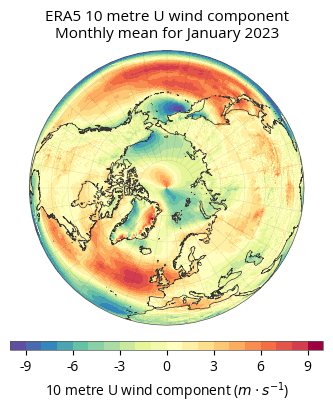

In [14]:
import cartopy.crs as ccrs

earthkit.maps.schema.figsize = (4, 4)

crs = ccrs.NearsidePerspective(central_latitude=90, central_longitude=0)
chart = earthkit.maps.Superplot(crs=crs)

chart.pcolormesh(wind, style=style, transform_first=False)

chart.coastlines(resolution="medium")
chart.gridlines(
    draw_labels=False,
    xlocs=range(-180, 180, 10),
    ylocs=range(-90, 90, 10),
    ylim=80,
    linestyle=":",
    alpha=0.5,
    color="black",
    linewidth=0.2,
)

chart.legend(location="bottom")

# For the title, we can take advantage of earthkit-maps metadata
# detection, which allows us to use format keys like 'variable_name'
# and 'time', which are then populated from the metadata of the data
# that's been plotted.
chart.title(
    "ERA5 {variable_name}\n"
    "Monthly mean for {time:%B %Y}",
    fontsize=11,
)

chart.save("overview-detail.png")

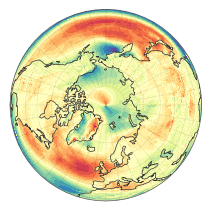

In [13]:
earthkit.maps.schema.figsize = (2, 2)
chart = earthkit.maps.Superplot(crs=crs)

chart.pcolormesh(wind, style=style, transform_first=False)
chart.coastlines()
chart.gridlines(
    draw_labels=False,
    xlocs=range(-180, 180, 10),
    ylocs=range(-90, 90, 10),
    ylim=80,
    linestyle=":",
    alpha=0.5,
    color="black",
    linewidth=0.2,
)

chart.save("overview.png")